<a href="https://colab.research.google.com/github/zzhou292/optic_sensing/blob/main/0311/5us-fast/process_spectrogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import dependencies
import sys
import os
import pandas as pd
import math
#from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import numpy as np
from numpy import nan as Nan
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


from datetime import datetime, timedelta
#import time as t 
from scipy.fftpack import fft, ifft

from scipy import signal

plt.rcParams['figure.figsize'] = [12, 6]

#Value Arrays
time_data = []
V1_data = []
V2_data = []
V3_data = []

In [2]:
!git clone https://github.com/zzhou292/optic_sensing.git

Cloning into 'optic_sensing'...
remote: Enumerating objects: 1895, done.
remote: Counting objects: 100% (372/372), done.
remote: Compressing objects: 100% (174/174), done.
remote: Total 1895 (delta 199), reused 361 (delta 194), pack-reused 1523
Receiving objects: 100% (1895/1895), 511.18 MiB | 14.00 MiB/s, done.
Resolving deltas: 100% (1375/1375), done.
Updating files: 100% (1573/1573), done.


In [85]:
#check format
#filename = 'optic_sensing/0311/5us-fast/20230311-0003_01.csv'
#test_df = pd.read_csv(filename)
#test_df

In [86]:
def list_full_paths(directory):
    return [os.path.join(directory, file) for file in os.listdir(directory) if file.endswith('.csv')]

fileset = list_full_paths('optic_sensing/0311/5us-fast')
fileset.sort()
#fileset #check input

In [87]:
df_list = []
elapsed_time = 0.0
time_inc_per_file = 0.015

def DFLoader(i):
    global elapsed_time
    new_df = pd.read_csv(i, skiprows = [1])
    new_df = new_df.round({'Time':3})
    new_df['Time'] = new_df['Time'] + elapsed_time
    elapsed_time = new_df['Time'].iloc[-1] + time_inc_per_file
    return new_df

df = pd.concat(map(DFLoader, fileset))

df['Channel B'] = df['Channel B'] * 1000 #convert V output to mV output
df['Time'] = df['Time'] / 1000

In [89]:
df

,Time,Channel A,Channel B,Channel C
0,0.000000,407.5572,444.7281,-4.738250
1,0.000005,411.5096,444.7281,-4.738250
2,0.000010,407.5572,444.7281,-3.949311
3,0.000015,411.5096,444.7281,-4.344549
4,0.000020,407.5572,444.7281,-4.344549
...,...,...,...,...
99999,49.502935,399.6370,468.5347,-8.293860
100000,49.502940,395.6846,468.5347,-7.898622
100001,49.502945,399.6370,468.5347,-7.108144
100002,49.502950,399.6370,468.5347,-5.923966


In [100]:
df = df.iloc[::200, :] #downsampled data, every 200 samples (so 1KHz)

Text(0.5, 0, 'Time (seconds)')

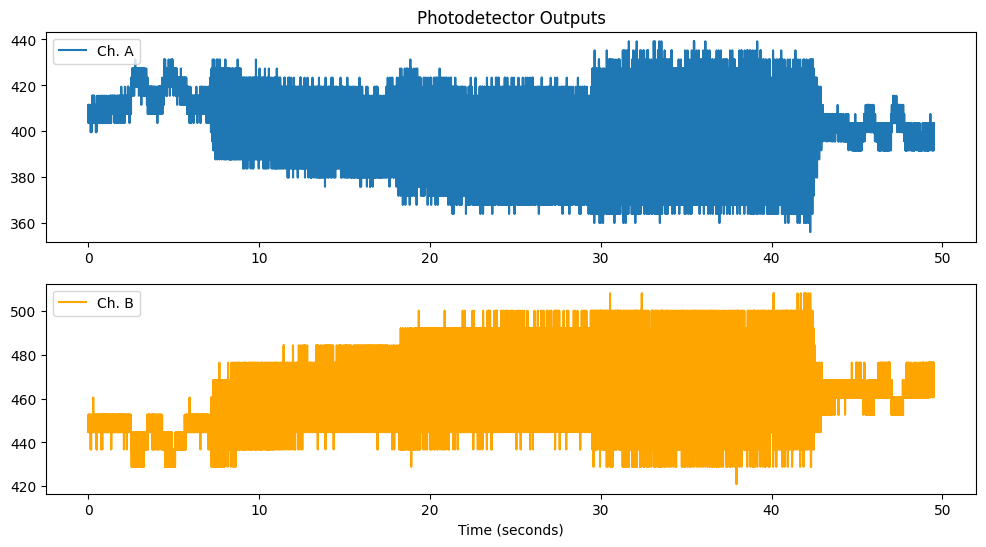

In [111]:
#Full timeline BPF Coefficient Plot

fig, ax = plt.subplots(2)
ax[0].set_title("Photodetector Outputs")
ax[0].plot(df[['Time']], df[['Channel A']].to_numpy(), label='Ch. A')
ax[0].legend(loc='upper left')
ax[1].plot(df[['Time']], df[['Channel B']].to_numpy(), label='Ch. B', color="orange")
ax[1].legend(loc='upper left')
ax[1].set_xlabel("Time (seconds)")

In [112]:
eval_data = df[['Channel A']].values.flatten() #Choose which channel to monitor

(0.5, 100.0)

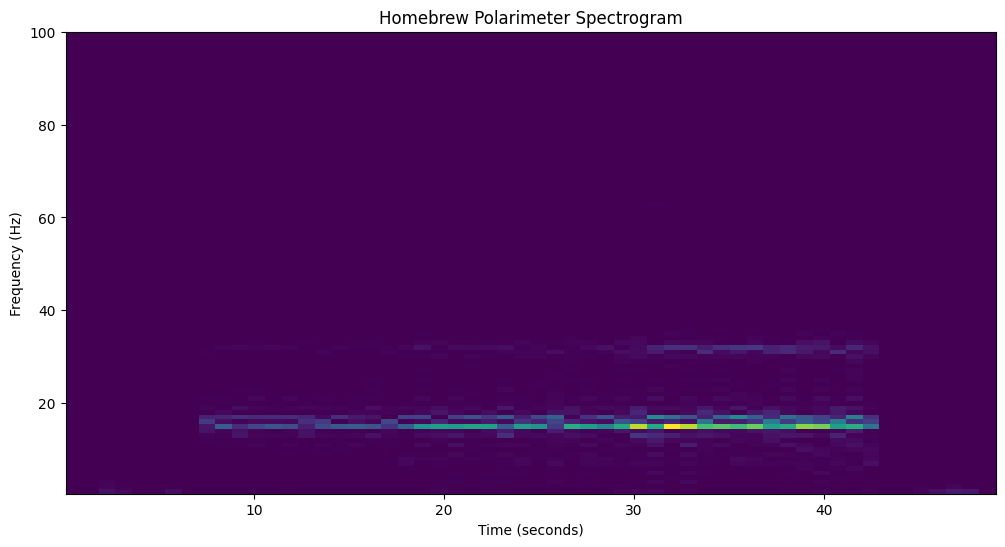

In [116]:
f, t, Sxx = signal.spectrogram(eval_data, fs=1000, nperseg=1000)
plt.pcolormesh(t, f, Sxx)
plt.title('Homebrew Polarimeter Spectrogram')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (seconds)')
ax = plt.gca()
ax.set_ylim((.5, 100))
#ax.set_yscale('log')